# Download from the portal 

In [30]:
from __future__ import print_function

In [31]:
import os
import pylab as pl
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME") 
    puidata=os.getenv("PUIDATA")


In [32]:
!curl https://data.cityofnewyork.us/api/views/n7gv-k5yt/rows.csv?accessType=DOWNLOAD > cp.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  422k    0  422k    0     0  1739k      0 --:--:-- --:--:-- --:--:-- 1738k


In [33]:
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/cl4855/PUIdata


In [34]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/cl4855/PUIdata


In [35]:
!mv cp.csv $PUIDATA

In [36]:
!ls $PUIDATA

cp.csv	      dog.csv  MMR.csv
dhsdaily.csv  lib.csv  NYC_20Clean_20Air_20Survey_20Content.zip


In [37]:
import pandas as pd
cp = pd.read_csv("%s/cp.csv"%os.getenv("PUIDATA"))

In [38]:
cp.head(7)

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
0,05/2014,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,09/23/2013,182980960.0,-1915400.0,-9736936.0,01/14/2020 12:00:00 AM,1.0,79.0
1,02/2015,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,09/23/2013,168751769.0,-14229191.0,-9736936.0,07/19/2020 12:00:00 AM,187.0,79.0
2,08/2015,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,09/23/2013,165532447.0,-3219322.0,-9736936.0,08/08/2020 12:00:00 AM,20.0,79.0
3,01/2016,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,169276391.0,3743944.0,-9736936.0,04/01/2020 12:00:00 AM,-129.0,79.0
4,06/2016,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,169276393.0,2.0,-9736936.0,04/13/2020 12:00:00 AM,12.0,79.0
5,11/2016,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,169674706.0,398313.0,-9736936.0,09/17/2020 12:00:00 AM,157.0,79.0
6,04/2017,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,174177416.0,4502710.0,-9736936.0,11/30/2020 12:00:00 AM,74.0,79.0


In [39]:
cp.columns

Index(['Date Reported As Of', 'PID', 'Project Name', 'Description', 'Category',
       'Borough', 'Managing Agency', 'Client Agency', 'Current Phase',
       'Design Start', 'Budget Forecast', 'Latest Budget Changes',
       'Total Budget Changes', 'Forecast Completion',
       'Latest Schedule Changes', 'Total Schedule Changes'],
      dtype='object')

In [40]:
cp.size

21424

In [41]:
cp.drop(['Date Reported As Of', 'PID', 'Project Name', 'Description', 'Category',
       'Borough', 'Managing Agency', 'Client Agency', 'Current Phase',
       'Design Start', 'Budget Forecast', 'Latest Budget Changes',
       'Total Budget Changes', 'Forecast Completion'],axis=1,inplace=True)

In [42]:
cp.head(7)

,Latest Schedule Changes,Total Schedule Changes
0,1.0,79.0
1,187.0,79.0
2,20.0,79.0
3,-129.0,79.0
4,12.0,79.0
5,157.0,79.0
6,74.0,79.0


In [43]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0,-2000,'Figure1:Schedule Changes of Capital Projects')

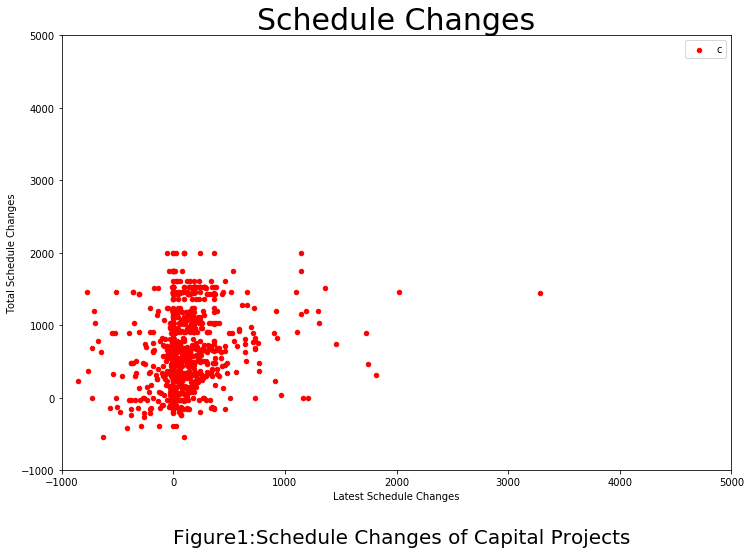

In [44]:
cp.plot(x="Latest Schedule Changes",y="Total Schedule Changes",kind='scatter',figsize=(12,8),xlim=(-1000,5000),ylim=(-1000,5000),color='red')
pl.title('Schedule Changes',fontsize=30)
pl.legend("c")
pl.text(0,-2000,"Figure1:Schedule Changes of Capital Projects",fontsize=20)

# Use API and download a json file

In [45]:
url = "https://data.cityofnewyork.us/resource/4bz7-ynm6.json"

In [46]:
cp=pd.read_json(url)

In [47]:
cp.head(100)

,borough,budget_forecast,category,client_agency,current_phase,date_reported_as_of,description,design_start,forecast_completion,latest_budget_changes,latest_schedule_changes,managing_agency,pid,project_name,total_budget_changes,total_schedule_changes
0,Brooklyn,182980960,Wastewater Treatment,DEP,Design,05/2014,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-01-14T00:00:00.000,-1915400.0,1.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
1,Brooklyn,168751769,Wastewater Treatment,DEP,Construction Procurement,02/2015,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-07-19T00:00:00.000,-14229191.0,187.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
2,Brooklyn,165532447,Wastewater Treatment,DEP,Construction Procurement,08/2015,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-08-08T00:00:00.000,-3219322.0,20.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
3,Brooklyn,169276391,Wastewater Treatment,DEP,Construction,01/2016,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-04-01T00:00:00.000,3743944.0,-129.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
4,Brooklyn,169276393,Wastewater Treatment,DEP,Construction,06/2016,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-04-13T00:00:00.000,2.0,12.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
5,Brooklyn,169674706,Wastewater Treatment,DEP,Construction,11/2016,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-09-17T00:00:00.000,398313.0,157.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
6,Brooklyn,174177416,Wastewater Treatment,DEP,Construction,04/2017,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-11-30T00:00:00.000,4502710.0,74.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
7,Brooklyn,175128410,Wastewater Treatment,DEP,Construction,09/2017,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-04-28T00:00:00.000,950994.0,-216.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
8,Brooklyn,175159424,Wastewater Treatment,DEP,Construction,03/2018,The 26th Ward WWTP is mandated to be upgraded ...,2013-09-23T00:00:00.000,2020-04-01T00:00:00.000,31015.0,-27.0,DEP,3,26th Ward Waste Water Treatment Plant Prelimin...,-9736936,79
9,Citywide,165677950,Wastewater Treatment,DEP,Construction Procurement,09/2013,Carbon addition to enhance nitrogen removal at...,2012-01-25T00:00:00.000,2016-08-15T00:00:00.000,NaN,NaN,DEP,5,Carbon Facility Addition,-35664433,583


In [48]:
cp.columns

Index(['borough', 'budget_forecast', 'category', 'client_agency',
       'current_phase', 'date_reported_as_of', 'description', 'design_start',
       'forecast_completion', 'latest_budget_changes',
       'latest_schedule_changes', 'managing_agency', 'pid', 'project_name',
       'total_budget_changes', 'total_schedule_changes'],
      dtype='object')

In [49]:
cp_3=cp[["design_start","latest_schedule_changes","total_schedule_changes"]]

In [50]:
cp_3.rename(columns={'design_start':'Design Start',
                     'latest_schedule_changes':'Latest Schedule Changes',
                     'total_schedule_changes':'Total Schedule Changes'},inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


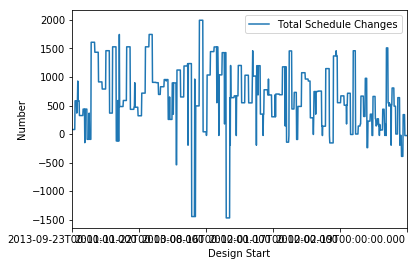

In [51]:
ax = cp_3.plot(x='Design Start', y='Total Schedule Changes');
ax.set_ylabel("Number");

In [52]:
cp_3.head()

,Design Start,Latest Schedule Changes,Total Schedule Changes
0,2013-09-23T00:00:00.000,1.0,79
1,2013-09-23T00:00:00.000,187.0,79
2,2013-09-23T00:00:00.000,20.0,79
3,2013-09-23T00:00:00.000,-129.0,79
4,2013-09-23T00:00:00.000,12.0,79


In [53]:
cp_3.columns.values.tolist()

['Design Start', 'Latest Schedule Changes', 'Total Schedule Changes']

In [54]:
from datetime import datetime
cp_3["Design Start"] = cp_3["Design Start"].apply(lambda x: pd.Timestamp(x))
cp_3['Design Start']=cp_3['Design Start'].dt.strftime('%d-%m-%Y')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [55]:
cp_3.head()

,Design Start,Latest Schedule Changes,Total Schedule Changes
0,23-09-2013,1.0,79
1,23-09-2013,187.0,79
2,23-09-2013,20.0,79
3,23-09-2013,-129.0,79
4,23-09-2013,12.0,79


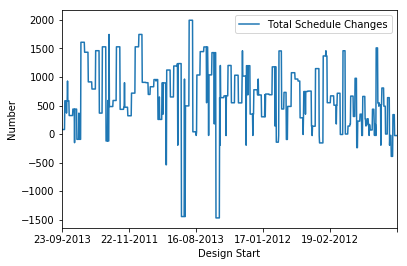

In [56]:
ax = cp_3.plot(x='Design Start', y='Total Schedule Changes')
ax.set_ylabel("Number");

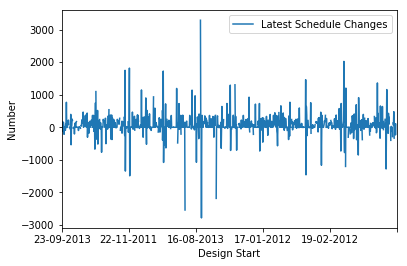

In [57]:
ax = cp_3.plot(x='Design Start', y='Latest Schedule Changes')
ax.set_ylabel("Number");